<a href="https://colab.research.google.com/github/victorsergio/gradient-descent/blob/main/Gradient_Descend_Exponential_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

def gradient_descent(X, y, theta_parameters, learning_rate, epochs):
    m = len(X)  # number of samples

    losses_list = list()
    parameters_list = list()

    for i in range(epochs):

        # Calculate h in a vectorized form
        y_hat = np.dot(X, theta_parameters)

        # Calculate exponential loss
        loss = np.exp(-y * y_hat)

        # Gradient calculation, vectorize
        gradient = (1 / m) * np.dot(X.T, -y * loss)

        # Parameters update
        theta_parameters = theta_parameters - learning_rate * gradient

        # Keep a log of parameters and loss values for each epoch
        losses_list.append( (1 / m) * np.sum(loss))
        parameters_list.append(theta_parameters)

    return parameters_list, losses_list


epochs = 50
learning_rate = 0.1
n_samples = 50

# Seed for reproducibility
seed = 10
random.seed(seed)

# Create a binary classification dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_samples=n_samples, n_classes=2, random_state=seed, flip_y=0.1 )

# Adding x_0
x_0 = np.ones((n_samples, 1))
X = np.hstack((x_0, X))

# Re-labelling for negative class
y[y==0] = -1

# Initialize theta parameters randomly
theta_parameters = np.array([random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)])

parameters_list, losses = gradient_descent(X, y, theta_parameters, learning_rate, epochs)


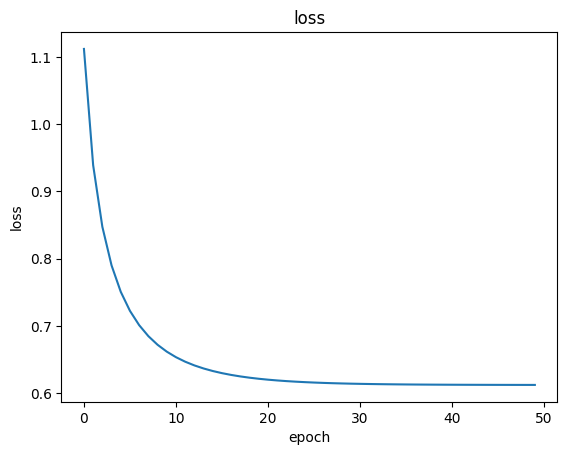

In [100]:
sns.lineplot(data=losses)
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

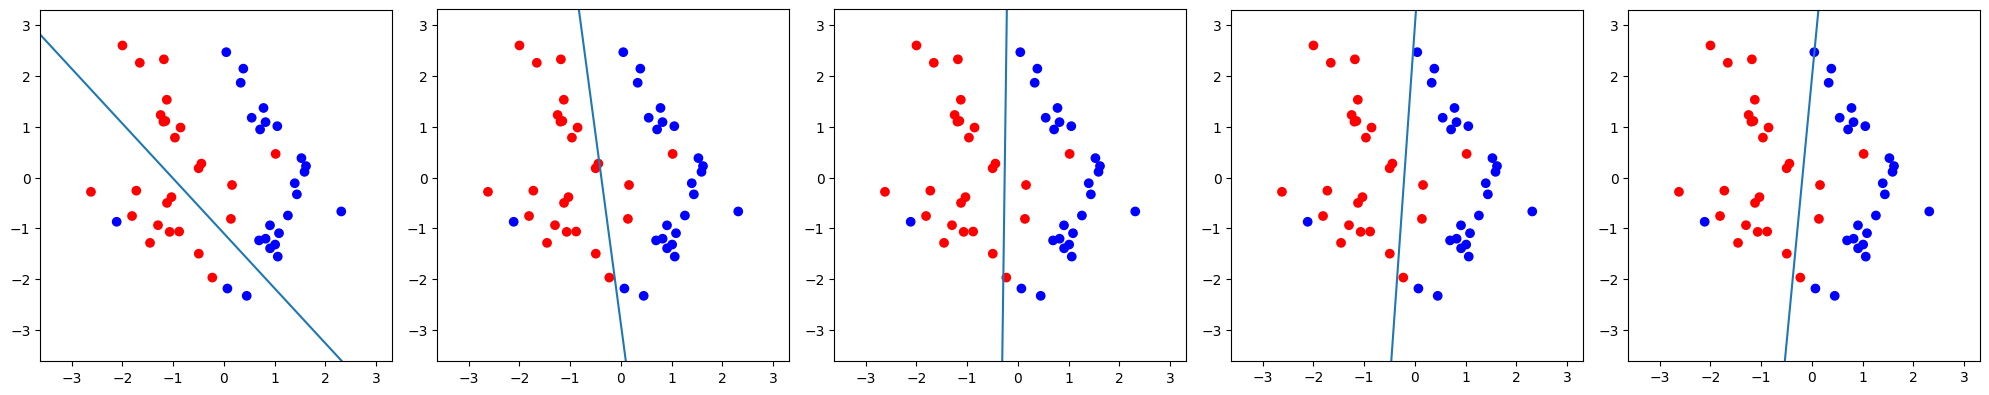

In [101]:
colors = ['red' if element == -1 else 'blue' for element in y]


x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

x_vals = np.linspace(x_min, x_max, 100)

n_lines = len(parameters_list[::10])
fig, axes = plt.subplots(1, n_lines, figsize=(20, 20))

for i, theta_parameters in enumerate(parameters_list[::10]):
    theta_0, theta_1, theta_2 = theta_parameters
    y_vals = -(theta_0 + theta_1 * x_vals) / theta_2
    axes[i].scatter(X[:, 1], X[:, 2], c=colors)
    axes[i].plot(x_vals, y_vals)
    axes[i].set_aspect('equal','box')
    axes[i].set_xlim([x_min, x_max])
    axes[i].set_ylim([y_min, y_max])

plt.tight_layout()
